1. [Подготовка данных к анализу](#start)
    * [Просмотр данных ](#Viewing_data)
    *[Проверка на дубликаты](#duplicates) 
2. [Анализ данных](#analysis)
    * [Исследование соотношения видов объектов общественного питания по количеству](#a)
    * [Исследование соотношения сетевых и несетевых заведений по количеству](#b)
    * [Для какого вида объекта общественного питания характерно сетевое распространение](#c)
    * [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест](#d)
    * [Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест](#e)
    * [Выделить в отдельный столбец информацию об улице](#f)
    * [Построить график топ-10 улиц по количеству объектов общественного питания. Определить в каких районах Москвы находятся эти улицы](#g)
    * [Найти число улиц с одним объектом общественного питания. Определить в каких районах Москвы находятся эти улицы](#h)
3. [Общий вывод](#end)   

###  Подготовка данных к анализу
<a id="start"></a> 

#### Просмотр данных
<a id='Viewing_data'></a> 

In [1]:
import pandas as pd #импортирование библиотеки pandas

In [2]:
import matplotlib.pyplot as plt #импортирование библиотеки seaborn

In [3]:
import seaborn as sns #импортирование библиотеки seaborn

In [4]:
import os #импортирование модуля os

In [6]:
data.info() #просмотр информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


`id` — идентификатор объекта;

`object_name` — название объекта общественного питания;

`chain` — сетевой ресторан;

`object_type` — тип объекта общественного питания;

`address` — адрес;

`number` — количество посадочных мест.

In [7]:
data.head() #просмотр таблицы

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Вывод:**

В данных не было обнаружено пропусков. Типы данных соответствуют информации содержащийся в столбцах.

#### Проверка на дубликаты
<a id="duplicates"></a> 

In [8]:
data.duplicated().sum() #поиск явных дубликатов

0

In [9]:
data.duplicated(subset=['id']).sum() #проверка на дубликаты идентификатор объекта

0

In [10]:
data['object_name'] = data['object_name'].str.lower() #приведение к одному регистру

In [11]:
data['object_name'].sort_values().unique() #просмотр уникальных значений

array(['1-й мок', '1-ый московский кадетский корпус',
       '100 личная столовая', ..., 'яуза', 'ёбидоёби', 'ёрш'],
      dtype=object)

In [12]:
data['chain'].value_counts() #просмотр уникальных значений

нет    12398
да      2968
Name: chain, dtype: int64

In [13]:
data['object_type'].value_counts() #просмотр уникальных значений

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [14]:
data['address'].value_counts() #просмотр уникальных значений

город Москва, Ходынский бульвар, дом 4                  95
город Москва, Пресненская набережная, дом 2             63
город Москва, проспект Мира, дом 211, корпус 2          60
город Москва, Кировоградская улица, дом 13А             53
город Москва, площадь Киевского Вокзала, дом 2          48
                                                        ..
город Москва, Бибиревская улица, дом 8, корпус 1         1
город Москва, улица Перерва, дом 19, строение 1          1
город Москва, Студёный проезд, дом 7Г                    1
город Москва, улица Соловьиная Роща, дом 16              1
город Москва, Фестивальная улица, дом 4А, строение 1     1
Name: address, Length: 9108, dtype: int64

In [15]:
data.duplicated(subset=['id']).sum()

0

In [16]:
data.duplicated(subset=['object_name','chain','object_type','address','number']).sum()

85

**Вывод:**

При проверке датасета явные и не были обнаружены. Из всех столбцов не должно быть дубликатов в столбце идентификатор объекта, в других столбцах выявлено 85 неявных дубликатов. Но у них индивидуальный идентификационный номер, без дополнительной информации невозможно понять почему так произошло. 

### Анализ данных
<a id='analysis'></a>  

#### Исследование соотношения видов объектов общественного питания по количеству
<a id="a"></a>  

In [17]:
data['object_type'].value_counts() #просмотр уникальных значений

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [18]:
object_pivot= data.pivot_table(index='object_type', values='id',aggfunc='count').sort_values(by='id', ascending=False) 
#построение сводной таблицы

In [19]:
object_pivot = object_pivot.reset_index(level=['object_type']) #изменение столбца индекса

In [20]:
object_pivot #просмотр получившшейся таблицы

,object_type,id
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


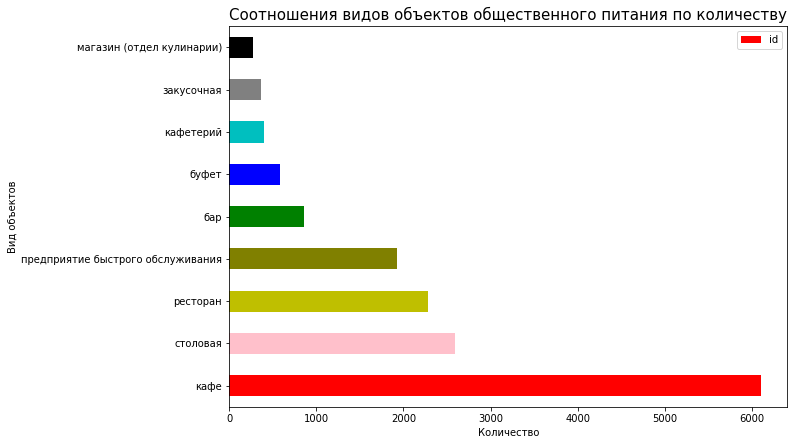

In [21]:
object_pivot.plot.barh(x='object_type', y='id', color = ['r','pink','y','olive','g','b','c','gray','black'],figsize=(10, 7)) 
plt.title('Cоотношения видов объектов общественного питания по количеству', fontsize=15)
plt.ylabel("Вид объектов")
plt.xlabel("Количество")
plt.show()
#построение столбчатой диаграммы

**Вывод:**

Больше всего объектов типов "кафе", меньше всего "магазин (отдел кулинарии)"

#### Исследование соотношения сетевых и несетевых заведений по количеству
<a id="b"></a>  

In [22]:
data['chain'].value_counts() #просмотр уникальных значений

нет    12398
да      2968
Name: chain, dtype: int64

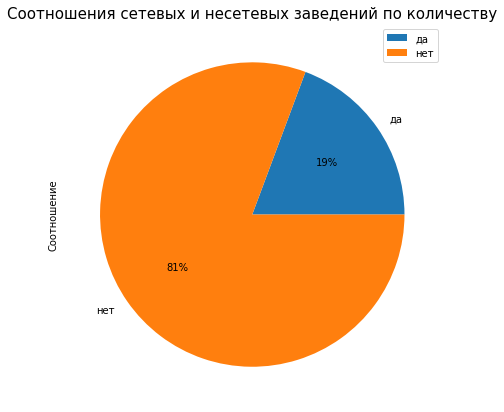

In [23]:
chain_pivot = data.pivot_table(index='chain', values='id',aggfunc='count').plot(kind='pie', y='id',autopct='%1.0f%%',figsize=(10, 7))
plt.title('Cоотношения сетевых и несетевых заведений по количеству', fontsize=15)
plt.ylabel("Соотношение")
plt.show()
 #построение сводной таблицы и круговой диаграммы

**Вывод:**

Больше всего не сетевых мест(81%).

#### Для какого вида объекта общественного питания характерно сетевое распространение
<a id="c"></a>  

In [24]:
network_location_1 = data.pivot_table(index='object_type', values='id',aggfunc='count').sort_values(by='id', ascending=False)
#построение сводной таблицы

In [25]:
network_location_1 = network_location_1.reset_index(level=['object_type']) #изменение столбца индекса

In [26]:
network_location_1 #просмотр таблицы

,object_type,id
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


In [27]:
network_location_2 = data.query('chain == "да"').pivot_table(index='object_type', values='id',aggfunc='count').sort_values(by='id', ascending=False)
 #построение сводной таблицы

In [28]:
network_location_2 = network_location_2.rename (columns= {'id': 'id_2'})  #переименование столбцов

In [29]:
network_location_2 = network_location_2.reset_index(level=['object_type']) #изменение столбца индекса

In [30]:
network_location_2 #просмотр получившейся таблицы

,object_type,id_2
0,кафе,1396
1,предприятие быстрого обслуживания,791
2,ресторан,544
3,магазин (отдел кулинарии),78
4,закусочная,56
5,кафетерий,52
6,бар,37
7,буфет,11
8,столовая,3


In [31]:
network_location = pd.merge(network_location_1,network_location_2) #слияние таблиц

In [32]:
network_location.set_index('object_type', inplace=True) #удаление индекса

In [33]:
network_location

,id,id_2
object_type,,
кафе,6099,1396
столовая,2587,3
ресторан,2285,544
предприятие быстрого обслуживания,1923,791
бар,856,37
буфет,585,11
кафетерий,398,52
закусочная,360,56
магазин (отдел кулинарии),273,78


In [34]:
network_location['percent'] = network_location['id_2']*100/network_location['id'] #добавление нового столбца

In [35]:
network_location = network_location.sort_values(by='percent') #сортировка по столбцу

In [36]:
network_location #просмотр столбца

,id,id_2,percent
object_type,,,
столовая,2587,3,0.115964
буфет,585,11,1.880342
бар,856,37,4.322430
кафетерий,398,52,13.065327
закусочная,360,56,15.555556
кафе,6099,1396,22.888998
ресторан,2285,544,23.807440
магазин (отдел кулинарии),273,78,28.571429
предприятие быстрого обслуживания,1923,791,41.133645


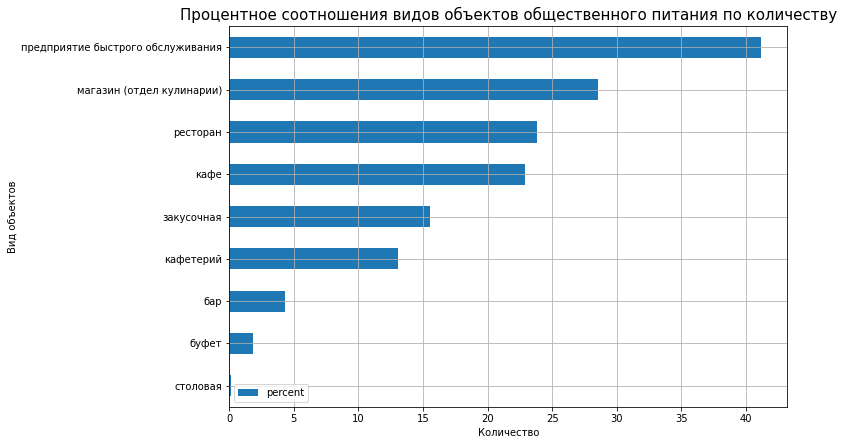

In [37]:
network_location.plot.barh(y = ['percent'], title = "Dishes", grid = True, figsize=(10, 7), legend = True) 
plt.title('Процентное соотношения видов объектов общественного питания по количеству', fontsize=15)
plt.ylabel("Вид объектов")
plt.xlabel("Количество")
plt.show()
#построение столбчатой диаграммы

**Вывод:**

Сетевое распространение характерно для заведений типа "кафе", не характерно для типа "столовая".

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест
<a id="d"></a>  

In [38]:
data2 = data.query('chain == "да"') #созание новой таблицы по условию 

In [39]:
object_number = data2.groupby('object_name').agg({'object_type': ['count'],
        'number' : ['median']}) #создание сводной таблицы(групировка данных)

In [40]:
object_number.columns = ['objects_count', 'median_number'] #изменение названия столбцов

In [41]:
object_number #просмотр получившийся таблицы

,objects_count,median_number
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,68.0
boobo,1,46.0
...,...,...
ямми микс,1,2.0
ян примус,1,300.0
японский ресторан «ваби-саби»,1,155.0


In [42]:
 object_number.describe() #Просмотр информации по таблице

,objects_count,median_number
count,577.000000,577.000000
mean,5.143847,58.047660
std,15.554623,53.689322
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,43.500000
75%,3.000000,83.500000
max,157.000000,306.000000


In [43]:
def objects_category(row): #создание функции котигоризирующей доход
    objects = row['objects_count']
    number = row['median_number']
    
    if objects <= 3:
        if number <= 58:
            return 'Мало заведений и мало посадочных мест'
    if objects <= 3: 
        if number > 58:
            return 'Мало заведений и много посадочных мест'
    if objects > 3: 
        if number <= 58:
            return 'Много заведений и мало посадочных мест'
    if objects > 3: 
        if number > 58:
            return 'Много заведений и много посадочных мест'

In [44]:
object_number['objects_category'] = object_number.apply(objects_category, axis=1) 
#запись получившихся котигорий в новый столбец

In [45]:
object_number #просмотр получившийся таблицы

,objects_count,median_number,objects_category
object_name,,,
beverly hills diner,1,88.0,Мало заведений и много посадочных мест
bierloga,1,75.0,Мало заведений и много посадочных мест
black & white,1,40.0,Мало заведений и мало посадочных мест
bocconcino,3,68.0,Мало заведений и много посадочных мест
boobo,1,46.0,Мало заведений и мало посадочных мест
...,...,...,...
ямми микс,1,2.0,Мало заведений и мало посадочных мест
ян примус,1,300.0,Мало заведений и много посадочных мест
японский ресторан «ваби-саби»,1,155.0,Мало заведений и много посадочных мест


In [46]:
object_number = object_number.pivot_table(index='objects_category',values='objects_count', aggfunc='count') 
#построение сводной таблицы

In [47]:
object_number #просмотр таблицы

,objects_count
objects_category,
Мало заведений и мало посадочных мест,274
Мало заведений и много посадочных мест,179
Много заведений и мало посадочных мест,81
Много заведений и много посадочных мест,43


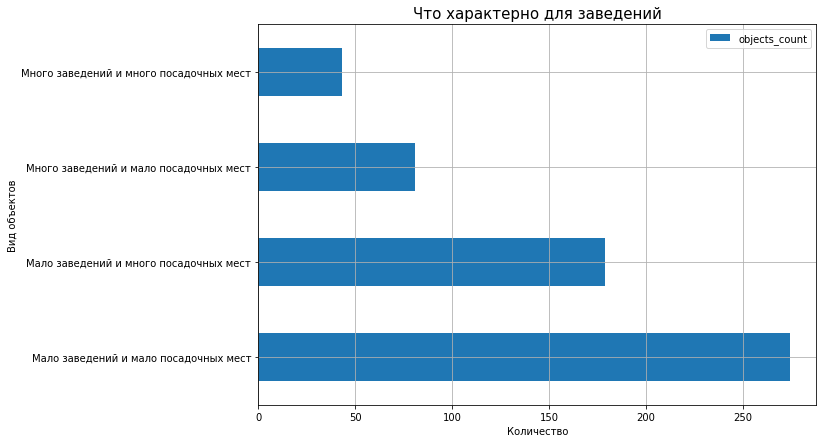

In [48]:
object_number.plot.barh(y = ['objects_count'], grid = True, figsize=(10, 7), legend = True) 
plt.title('Что характерно для заведений', fontsize=15)
plt.ylabel("Вид объектов")
plt.xlabel("Количество")
plt.show()
#построение диаграммы

**Вывод:**

На диаграмме видно, что у сетевых заведений больше распространено мало посадочных мест(до 58).

#### Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест
<a id="e"></a>  

In [49]:
object_number_mean = data.pivot_table(index='object_type', values='number', aggfunc='mean').sort_values('number',ascending = False)
#создание сводной таблицы

In [50]:
object_number_mean_2 = data.pivot_table(index='object_type', values='number', aggfunc='median').sort_values('number',ascending = False)
#создание сводной таблицы

In [51]:
object_number_mean = object_number_mean.reset_index(level=['object_type']) #изменение столбца индексов в таблице

In [52]:
object_number_mean_2 = object_number_mean_2.reset_index(level=['object_type']) #изменение столбца индексов в таблице

In [53]:
object_number_mean #просмотр получившийся таблицы

,object_type,number
0,столовая,130.246618
1,ресторан,96.834136
2,буфет,51.129915
3,бар,43.494159
4,кафе,39.716019
5,предприятие быстрого обслуживания,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,магазин (отдел кулинарии),5.589744


In [54]:
object_number_mean_2 #просмотр второй тиблицы

,object_type,number
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,кафетерий,6
6,предприятие быстрого обслуживания,5
7,закусочная,0
8,магазин (отдел кулинарии),0


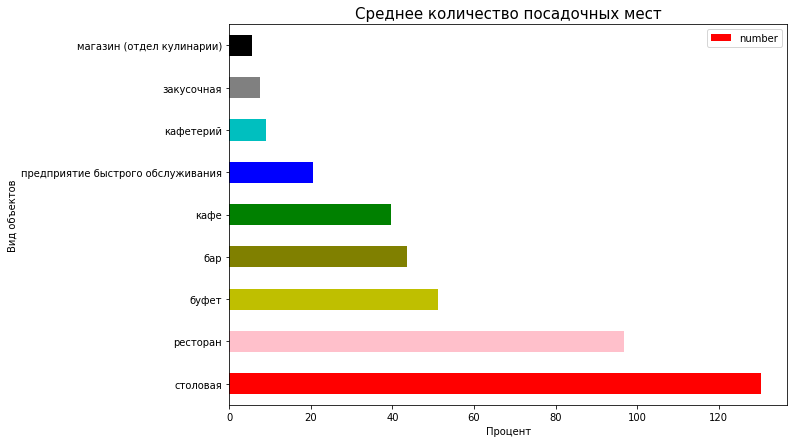

In [55]:
object_number_mean.plot.barh(x='object_type', y='number', color = ['r','pink','y','olive','g','b','c','gray','black'],figsize=(10, 7)) 
plt.title('Cреднее количество посадочных мест', fontsize=15)
plt.ylabel("Вид объектов")
plt.xlabel("Процент")
plt.show()
#построение диаграммы

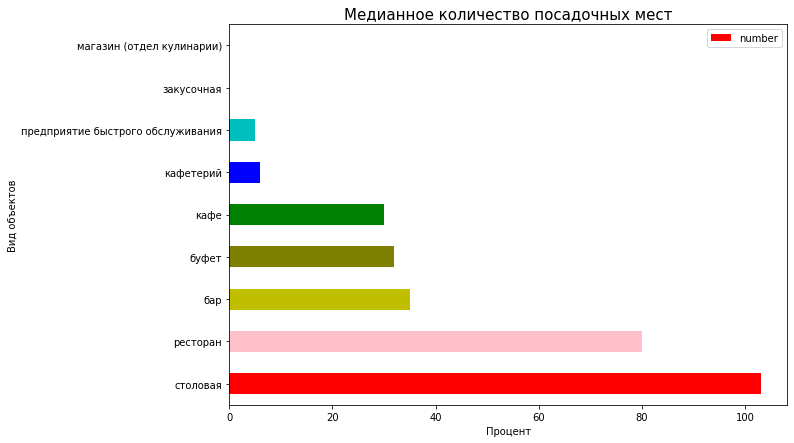

In [56]:
object_number_mean_2.plot.barh(x='object_type', y='number', color = ['r','pink','y','olive','g','b','c','gray','black'],figsize=(10, 7)) 
plt.title('Медианное количество посадочных мест', fontsize=15)
plt.ylabel("Вид объектов")
plt.xlabel("Процент")
plt.show()
#построение диаграммы

**Вывод:**

По среднему показателю, самое большое среднее количество посадочных мест в типе "Столовая", а самое маленькое в "магазин (отдел кулинарии)". По медианному показателю данные немного отличаются, но самое большое значение так же у "Столовая", а самое маленькое разделяют "Закусочная" и "магазин (отдел кулинарии)".

#### Выделить в отдельный столбец информацию об улице
<a id="f"></a>  

In [57]:
data['street'] = data['address'].apply(lambda x: x.split(', ')[1]) #выделение из столбца нужных данных

In [58]:
data.head() #просмотр получившийся таблицы

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


#### Построить график топ-10 улиц по количеству объектов общественного питания. Определить в каких районах Москвы находятся эти улицы
<a id="g"></a>  

In [59]:
from io import BytesIO #импорт BytesIO

In [60]:
import requests #импорт requests

In [61]:
spreadsheet_id = '1gq1a5htKmigLBpskiMMC6OCnW6dDXRyJd3eiIILdPko'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_streat = pd.read_csv(BytesIO(r.content)) 
data_streat
#добавление стороннего файла

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [62]:
data_streat.info() #просмотр информации внещнего датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [63]:
data_streat = data_streat.rename(columns= {'streetname': 'street'}) #переименование столбца для соединения

In [64]:
 data_streat #просмотр получившийся таблицы

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [65]:
data = data[data['street'].apply(lambda x: "город" not in x and "поселение" not in x and "микрорайон"not in x and "дом"not in x and "квартал" not in x and "деревня" not in x and "посёлок" not in x and "километр" not in x and "территория" not in x and "владение" not in x and "просек" not in x)]
#удаление неподходящих значений

In [66]:
street_top = data.pivot_table(index='street', values='id', aggfunc='count').sort_values('id',ascending = False).head(10)
#создание сводной таблицы

In [67]:
street_top #просмотр топ 10

,id
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


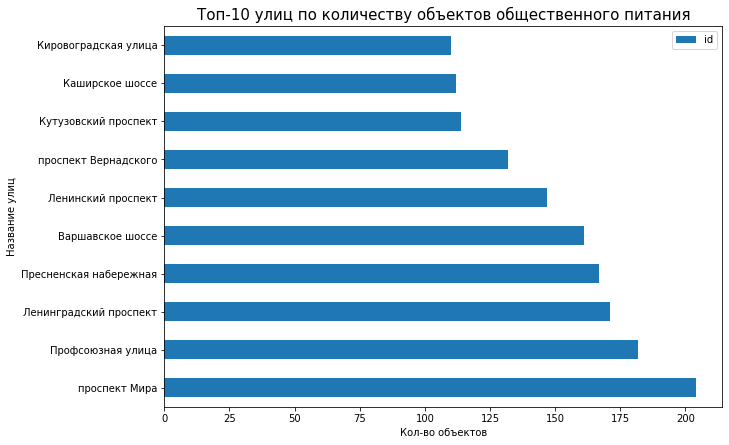

In [68]:
street_top.plot.barh(figsize=(10, 7))
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=15)
plt.ylabel("Название улиц")
plt.xlabel("Кол-во объектов")
plt.show()
#построение диаграммы

In [69]:
street_top = street_top.reset_index(level=['street']) #изменение столбца индексов в таблице

In [70]:
top_streat_external = pd.merge(street_top, data_streat, how='left') #объединение двух датасетов

In [71]:
top_streat_external  #просмотр таблицы

,street,id,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


In [72]:
top_streat_external['area'].sort_values().unique() #просмотр уникальных значений

array(['Академический район', 'Алексеевский район', 'Донской район',
       'Ломоносовский район', 'Мещанский район', 'Нагорный район',
       'Обручевский район', 'Останкинский район', 'Пресненский район',
       'Район Аэропорт', 'Район Беговой', 'Район Гагаринский',
       'Район Дорогомилово', 'Район Коньково', 'Район Марьина роща',
       'Район Москворечье-Сабурово', 'Район Нагатино-Садовники',
       'Район Орехово-Борисово Северное', 'Район Орехово-Борисово Южное',
       'Район Проспект Вернадского', 'Район Раменки', 'Район Ростокино',
       'Район Свиблово', 'Район Северное Бутово', 'Район Сокол',
       'Район Теплый Стан', 'Район Тропарево-Никулино',
       'Район Фили-Давыдково', 'Район Черемушки',
       'Район Чертаново Северное', 'Район Чертаново Центральное',
       'Район Чертаново Южное', 'Район Южное Бутово', 'Район Якиманка',
       'Район Ясенево', 'Хорошевский район', 'Ярославский Район'],
      dtype=object)

**Вывод:**

В топ 10 улиц по кол-ву объектов общественного питания входят: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. Данные улицы проходят через 37 районов.

#### Найти число улиц с одним объектом общественного питания. Определить в каких районах Москвы находятся эти улицы
<a id="h"></a>  

In [73]:
street_object = data.pivot_table(index='street', values='object_name', aggfunc='count').sort_values('object_name',ascending = False)
#создание сводной таблицы

In [74]:
street_object = street_object.reset_index(level=['street']) #изменение столбца индексов в таблице

In [75]:
street_object = street_object.loc[street_object['object_name'] == 1].reset_index(drop=True) 
#применение к таблице определенного условия

In [76]:
street_object #просмотр таблицы

,street,object_name
0,2-я Ямская улица,1
1,улица Зенитчиков,1
2,улица Фонвизина,1
3,1-й Магистральный тупик,1
4,улица Фадеева,1
...,...,...
517,Электрический переулок,1
518,Зарайская улица,1
519,Заводской проезд,1
520,Жуков проезд,1


In [77]:
street_object['street'].value_counts() #нахождение уникальных значений

Интернациональная улица        1
Молодёжная улица               1
4-й Вятский переулок           1
Пестовский переулок            1
Малая Андроньевская улица      1
                              ..
переулок Красина               1
Петровско-Разумовская аллея    1
Уржумская улица                1
4-я Кабельная улица            1
Рижский проезд                 1
Name: street, Length: 522, dtype: int64

In [78]:
data_streat_external = pd.merge(street_object, data_streat, how='left') #объединение двух датасетов

In [79]:
data_streat_external['area'].sort_values().unique() #просмотр уникальных значений

array(['Алексеевский район', 'Алтуфьевский район', 'Бабушкинский район',
       'Басманный район', 'Бескудниковский Район', 'Бутырский район',
       'Войковский Район', 'Головинский район', 'Даниловский район',
       'Дмитровский район', 'Донской район', 'Красносельский район',
       'Лосиноостровский район', 'Мещанский район', 'Можайский Район',
       'Молжаниновский район', 'Нагорный район', 'Нижегородский район',
       'Обручевский район', 'Останкинский район', 'Пресненский район',
       'Район Арбат', 'Район Аэропорт', 'Район Беговой',
       'Район Бирюлево Восточное', 'Район Богородское', 'Район Внуково',
       'Район Восточное Измайлово', 'Район Восточный',
       'Район Выхино-Жулебино', 'Район Гагаринский', 'Район Гольяново',
       'Район Дорогомилово', 'Район Замоскворечье',
       'Район Западное Дегунино', 'Район Зюзино', 'Район Ивановское',
       'Район Измайлово', 'Район Коньково', 'Район Коптево',
       'Район Косино-Ухтомский', 'Район Котловка', 'Район Кузьмин

**Вывод:**

На 522 улицах(в 99 районах), присутствуют один объект общественного питания.

### Общий вывод:
<a id="end"></a> 

При проверке датасета явные и не были обнаружены. Из всех столбцов не должно быть дубликатов в столбце идентификатор объекта, в других столбцах выявлено 85 неявных дубликатов. Но у них индивидуальный идентификационный номер, без дополнительной информации невозможно понять почему так произошло. Типы данных соответствуют информации содержащийся в столбцах. Так же явные и неявные дубликаты не были обнаружены.

При анализе данных было выяснено, что: 
1. Больше всего объектов типов "кафе", меньше всего "магазин (отдел кулинарии)";
2. Больше всего не сетевых мест(81%);
3. Сетевое распространение характерно для заведений типа "кафе", не характерно для типа "столовая";
4. На диаграмме видно, что у сетевых заведений больше распространено мало посадочных мест(до 58).
5. По среднему показателю, самое большое среднее количество посадочных мест в типе "Столовая", а самое маленькое в "магазин (отдел кулинарии)". По медианному показателю данные немного отличаются, но самое большое значение так же у "Столовая", а самое маленькое разделяют "Закусочная" и "магазин (отдел кулинарии)".;
6. В топ 10 улиц по кол-ву объектов общественного питания входят: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. Данные улицы проходят через 37 районов.
7. На 522 улицах(в 99 районах), присутствуют один объект общественного питания.

**Рекомендации:** 

Самый популярный тип объекта общественного питания это "Кафе", тем самым можно предположить что на этот тип идет больших спрос. Так же более распространены несетевые места с малым количеством  мест(до 58), тем самым количество мест до 58 является оптимальным. На объектах типа "Кафе" среднее значение посадочных мест 40, а медианное значение 30. 

С улицами немного сложнее, нужно учитывать больше параметров чем имеется. Тем самым  лучше располагать Кафе на улице с меньшим количеством  объектов общественного питания, тем самым избегая для нового объекта большой конкуренции. Но так же надо учитывать расположение и проходимость улиц(в нашем случае этих данных нет), так как чем больше проходимость, тем больше вероятность большего притока новых клиентов. Так же многое зависит от рекламной компании проекта, чем лучше кампания тем больше вероятность, что Кафе будет конкурентно способным(так как о нем будет знать больше людей), даже на улицах с большим кол-вом других мест общественного  питания.

**Презентация:**

https://drive.google.com/file/d/1jsLG-OECXi6--c_uFBCrkAIV8MBDFvlf/view?usp=sharing